#### Arcpy + Geopandas combination

In [1]:
#Must be opened from ArcGIS Python Command Prompt (juptyter lab)
# Must have signed into ArcGIS online? (run ArcGIS Pro)

import arcpy
from arcpy import env
from arcpy.sa import *

import pandas as pd
import geopandas as gpd

from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

In [2]:
def renameShapeField(inshp,infieldname,outfieldname):
    '''renames a field in a shapefile using geopandas because arcpy doesn't support this.'''
    ingdf = gpd.read_file(inshp)
    ingdf.rename(columns={infieldname: outfieldname}, inplace=True)
    ingdf.to_file(inshp)
    print(f'Fieldname {infieldname} changed to {outfieldname} in shapefile.')

In [3]:
##inputs
# #======================= Brandy 2019-2018
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff19-18")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\dems\orig\brandy_dem2018.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\dems\orig\brandy_dem2019.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\shp\Stable_poly_18-19_expanded.shp")
# #Output dod name stem
# dodnamestem = r"DoD_19-18"
# detrendnamestem = r"Detrend_19-18_polyn"
# #region
# aoi = 'brandy'

#======================= Brandy 2019-2018 (restricted polygons)
#output dir
demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff19-18_restricted")
#DEMS
dem1 = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\dems\orig\brandy_dem2018.tif")
dem2 = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\dems\orig\brandy_dem2019.tif")
#Stable polygons
stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\shp\Stable_poly_18-19_restricted.shp")
#Output dod name stem
dodnamestem = r"DoD_19-18"
detrendnamestem = r"Detrend_19-18_polyn"
#region
aoi = 'brandy'

# #======================= Brandy 2020-2019
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff20-19")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\dems\orig\brandy_dem2019.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\dems\orig\brandy_dem2020.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\shp\Stable_poly_19-20_expanded.shp")
# #Output dod name stem
# dodnamestem = r"DoD_20-19"
# detrendnamestem = r"Detrend_20-19_polyn"
# #region
# aoi = 'brandy'

# #======================= Brandy 2020-2019 (restricted polygons)
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff20-19_restricted")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\dems\orig\brandy_dem2019.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\dems\orig\brandy_dem2020.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\shp\Stable_poly_19-20_restricted.shp")
# #Output dod name stem
# dodnamestem = r"DoD_20-19"
# detrendnamestem = r"Detrend_20-19_polyn"
# #region
# aoi = 'brandy'

# #======================= Boulder 2019-2018
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff19-18")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\dem\original\boulder_dem2018.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\dem\original\boulder_dem2019.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\shp\Stable_poly_18-19.shp")
# #Output dod name stem
# dodnamestem = r"DoD_19-18"
# detrendnamestem = r"Detrend_19-18_polyn"
# #region
# aoi = 'boulder'

# #======================= Boulder 2019-2018 (restricted polygons)
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff19-18_restricted_poly")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\dem\original\boulder_dem2018.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\dem\original\boulder_dem2019.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\shp\Stable_poly_18-19_restricted.shp")
# #Output dod name stem
# dodnamestem = r"DoD_19-18"
# detrendnamestem = r"Detrend_19-18_polyn"
# #region
# aoi = 'boulder'

# #======================= Boulder 2020-2019
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff20-19")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\dem\original\boulder_dem2019.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\dem\original\boulder_dem2020.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\shp\Stable_poly_19-20.shp")
# #Output dod name stem
# dodnamestem = r"DoD_20-19"
# detrendnamestem = r"Detrend_20-19_polyn"
# #region
# aoi = 'boulder'

# #======================= Boulder 2020-2019 (restricted polygons)
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff20-19_restricted_poly")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\dem\original\boulder_dem2019.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\dem\original\boulder_dem2020.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\shp\Stable_poly_19-20_restricted.shp")
# #Output dod name stem
# dodnamestem = r"DoD_20-19"
# detrendnamestem = r"Detrend_20-19_polyn"
# #region
# aoi = 'boulder'

# #======================= Whiskey 2019-2018 (restricted polygons)
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\demdiff19-18_restricted")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\dems\orig\whiskey_dem2018.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\dems\orig\whiskey_dem2019.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\shp\Whiskey_stable_poly_18-19_restricted.shp")
# #Output dod name stem
# dodnamestem = r"DoD_19-18"
# detrendnamestem = r"Detrend_19-18_polyn"
# #region
# aoi = 'whiskey'

# #======================= Whiskey 2020-2019 (restricted polygons)
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\demdiff20-19_restricted")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\dems\orig\whiskey_dem2019.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\dems\orig\whiskey_dem2020.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\shp\Whiskey_stable_poly_19-20_restricted.shp")
# #Output dod name stem
# dodnamestem = r"DoD_20-19"
# detrendnamestem = r"Detrend_20-19_polyn"
# #region
# aoi = 'whiskey'

# #======================= WhiteRock 2019-2018 (restricted polygons)
# #output dir
# demdiff_dir = Path(r"D:\Whiskeytown\dem_diff\whiterock\demdiff19-18_restricted_to_shoreline")
# #DEMS
# dem1 = Path(r"D:\Whiskeytown\dem_diff\whiterock\dem\orig\whiterock_dem2018.tif")
# dem2 = Path(r"D:\Whiskeytown\dem_diff\whiterock\dem\orig\whiterock_dem2019.tif")
# #Stable polygons
# stablepolyshp = Path(r"D:\Whiskeytown\dem_diff\whiterock\shp\Whiterock_stable_poly_18-19_restricted_to_shoreline.shp")
# #Output dod name stem
# dodnamestem = r"DoD_19-18"
# detrendnamestem = r"Detrend_19-18_polyn"
# #region
# aoi = 'whiterock'

In [4]:
#Set standard output dir and create dir
outdod_dir = Path(demdiff_dir, r"dod")
outdod_unadj_dir  = Path(demdiff_dir, r"dod\unadj")
outdod_adj_dir  = Path(demdiff_dir, r"dod\adj")
outdod_pt_dir  = Path(demdiff_dir, r"dod\shp")
outtrendraster_dir = Path(demdiff_dir, r"detrend")
outtrend_pt_dir = Path(demdiff_dir, r"detrend\shp")
outcoregdem_dir = Path(demdiff_dir, r"co-reg-dem")
scratch_dir = Path(demdiff_dir, r"arcpyscratch")

#create parent if doesn't exist
demdiff_dir.mkdir(parents=True, exist_ok=True)
#create subdir if don't exist
for direc in [outdod_dir, outdod_unadj_dir, outdod_adj_dir, outdod_pt_dir, outtrendraster_dir, outtrend_pt_dir, outcoregdem_dir, scratch_dir]:
    direc.mkdir(parents=True, exist_ok=True)



In [5]:
# Set environment settings
arcpy.env.workspace = str(scratch_dir)
arcpy.env.overwriteOutput = True
arcpy.env.compression = "LZW"

env.extent = str(dem1)
env.snapRaster = str(dem1)

# Check out the ArcGIS Spatial Analyst extension license
arcpy.CheckOutExtension("Spatial");

### 1. Make Unadjusted DoD 
(DEM2 - DEM1 = Unadjusted_DoD)

In [ ]:
#Make unadjusted DoD
print('Creating unadjusted DoD ...')
outunadjdod = Path(outdod_unadj_dir,dodnamestem + '_' + aoi + r'_unadj.tif')

dod = RasterCalculator([str(dem1), str(dem2)], ["dem1", "dem2"],
                                       "dem2-dem1", "FirstOf", "FirstOf")

dod.save(str(outunadjdod))


### 2. Create point shapefile of unadjusted DoD, then clip with stable area polygons 


In [ ]:
#Convert DoD to point shapefile, then clip with stable polygons and rename field to 'dod_unadj'
#inputs
outstablept_shp = str(Path(outdod_pt_dir, outunadjdod.stem + r'_stable_pts.shp')) #same as DoD, but '_stable_pts.shp')

#covert to points scratchfile
print('Coverting DoD to points ...')
arcpy.RasterToPoint_conversion(dod, r"memory\tempRasPt", "VALUE");
#clip scratchfile
print('Clipping points to stable areas ...')
arcpy.Clip_analysis(r"memory\tempRasPt", str(stablepolyshp), r"memory\tempRasPtClip", "");
#get polygon "type (paved, unpaved)" onto att table via spatial join
print('Spatial join to get polygon type attribute to points ...')
arcpy.analysis.SpatialJoin(r"memory\tempRasPtClip", str(stablepolyshp), outstablept_shp);

#rename field
print('Renaming field in point shapefile ...')
renameShapeField(outstablept_shp,'grid_code','dod_unadj')


#### 3. Calculate Error Trend Surfaces using residual values in stable area polygons (which should be zero) 
- Polynomial order 0 = uniform correction (mean of residuals)
- Polynomial order 1 = sloped plane
- Polynomial order 2 = quadratic surface
- Polynomial order 3 = cubic surface
- Polynomial order 4 = quartic surface


In [ ]:
#Calculate trend surface using all stable points (polynomial 0, 1 and 2) (and 3, 4?)

#Inputs/outputs
stablept_shp = outstablept_shp #(from cell above)
outtrendrasterstem = str(Path(outtrendraster_dir, detrendnamestem))

zField = "dod_unadj"
cellSize = 0.25
# PolynomialOrder = 2 (set in loop)
regressionType = "LINEAR"

for polyn_order in [0, 1, 2, 3, 4]:
    # Execute Trend
    print(f'Creating trend surface polynomial order {polyn_order}...')
    outTrend = Trend(stablept_shp, zField, cellSize, 
                     polyn_order, regressionType)
    outTrend.save(outtrendrasterstem + str(polyn_order) + ".tif")


#### 4. Apply Error Trend surfaces to DoD to create Adjusted DoD for visual comparisons.
Adjustment order is:  
 DoD - TrendRaster = AdjustedDoD
   
This is equivalent to adjusting DEM1:  
 DEM2 - DEM1 - TrendRaster = AdjustedDoD
 
Since  
TrendRaster = DoD residual which should be zero.   

For example:  
DEM2 = 3, DEM1 = 5, DoD = -2, TrendRaster = -2  
AdjustedDoD =  DEM2 - DEM1 - TrendRaster = 0  
             =  3 - 5 -(-2) = 0  
             =  DoD - TrendRaster = 0  
             =  -2 -(-2) = 0 


In [ ]:
# '''
# Apply to DoD to evaluate visually
# Adjustment order is:
#     DoD - TrendRaster = AdjustedDoD
# This is equivalent to adjusting DEM1:
#      DEM2 - DEM1 - TrendRaster = AdjustedDoD
# Since TrendRaster = DoD residual which should be zero.
# For example:
# DEM2 = 3, DEM1 = 5, DoD = -2, TrendRaster = -2
# AdjustedDoD =  DEM2 - DEM1 - TrendRaster = 0
#             =  3 - 5 -(-2) = 0
#             =  DoD - TrendRaster = 0
#             =  -2 -(-2) = 0
# '''

#inputs/outputs
inunadjdod = str(outunadjdod) #from above cell
intrendrasterstem = outtrendrasterstem #from cell above
outadjdodstem = str(Path(outdod_adj_dir, dodnamestem + '_' + aoi + r'_adj_polyn_'))

#loop through detrend surfaces and apply to DoD
for polyn_order in [0,1,2,3,4]:
    #apply adjustment
    trendraster = intrendrasterstem + str(polyn_order) + '.tif'
    adj = RasterCalculator([inunadjdod, trendraster], ["dod", "trendraster"],
                                       "dod-trendraster", "FirstOf", "FirstOf")
    adj.save(outadjdodstem + str(polyn_order) + '.tif')
    

### 5. Sanity check!  Make sure that ErrorTrendSurface is being correctly applied to DoD.

In [ ]:
#Sanity check to double check that DoD error correction is being done with teh right signs
PolynomialOrderSurface = 2

#inputs
intrendrasterstem = outtrendrasterstem #from cell above
trendraster = intrendrasterstem + str(PolynomialOrderSurface) + '.tif'
print(f'DEM1: {dem1}\n'
      f'DEM2: {dem2}\n'
      f'ErrorTrendRaster: {trendraster}\n\n'
      f'DoD = DEM2 - DEM1\n')

#Adjust DoD with trend raster
print(f'Method1:\n'
      f'AdjustedDoD = UnadjustedDoD - ErrorTrendRaster\n')
unadjdod = RasterCalculator([str(dem1), str(dem2)], ["dem1", "dem2"],
                                       "dem2 - dem1", "FirstOf", "FirstOf")
adjdod = RasterCalculator([unadjdod, trendraster], ["dod", "trendraster"],
                                       "dod - trendraster", "FirstOf", "FirstOf")
#Alternatively, Co-Register DEM1 to DEM2 using ErrorTrendRaster, then derive adjusted DoD.  
#Should be identical
print(f'Method2 (should be identical to Method1): \n'
      f'Co-RegisteredDEM1 = DEM1 + ErrorTrendRaster\n'
      f'AltAdjustedDoD = DEM2 - Co-RegisteredDEM1\n')
coregdem1 = RasterCalculator([str(dem1), trendraster], ["dem1", "trendraster"],
                                       "dem1 + trendraster", "FirstOf", "FirstOf")
altadjdod = RasterCalculator([coregdem1, str(dem2)], ["coregdem1", "dem2"],
                                       "dem2 - coregdem1", "FirstOf", "FirstOf")

doddiff = RasterCalculator([adjdod, altadjdod], ["adjdod", "altadjdod"],
                                       "adjdod - altadjdod", "FirstOf", "FirstOf")

#write output to get statistics
doddiff.save(arcpy.env.workspace + '\DoDDiffSanityCheck.tif')
print(f'Difference between Method1 and Method2 rasters (should be zero)')
#Get stats of doddiff
for stat in ['MEAN', 'STD', 'MAXIMUM', 'MINIMUM']:
    doddiff_result = arcpy.management.GetRasterProperties(arcpy.env.workspace + '\DoDDiffSanityCheck.tif', stat);
    outstat = doddiff_result.getOutput(0);
    print(f'{stat} = {str(outstat)}')

#clean up
arcpy.management.Delete(arcpy.env.workspace + '\DoDDiffSanityCheck.tif');


### 6. Decide which trend surface to use

In [ ]:
#Extract residual values from each adjusted DoD trend surface and evaluate bulk points

stablept_shp = str(Path(outdod_pt_dir, outunadjdod.stem + r'_stable_pts.shp')) #same as DoD, but '_pts.shp')
inadjdodstem = str(Path(outdod_adj_dir, dodnamestem + '_' + aoi + r'_adj_polyn_'))
outdetrendevalptshp = str(Path(outtrend_pt_dir, Path(outdod_pt_dir, outunadjdod.stem + r'_pts.shp') .stem + r'_detrend_eval.shp'))

#copy stable points to eval file
arcpy.Copy_management(stablept_shp, outdetrendevalptshp);

#derive list of adjusted dods and output fieldnames for multi-raster extract
inras_outfield_list = [[inadjdodstem + str(n) + '.tif', 'poly' + str(n) + 'resid'] for n in [0,1,2,3,4]]

#extract adjusted dod residual values to points
ExtractMultiValuesToPoints(outdetrendevalptshp, inras_outfield_list, "NONE")

#read into gdf to evaluate
tempgdf = gpd.read_file(outdetrendevalptshp)

#evaluate paved/unpaved
pavedgdfstat = tempgdf[tempgdf['type'] == 'paved'].drop(columns=['geometry','pointid', 'TARGET_FID','Join_Count','id']).describe([.025, .25, .5, .75, .975])
pavedgdfstat['type'] = 'paved'
pavedgdfstat['stat'] = pavedgdfstat.index
unpavedgdfstat = tempgdf[tempgdf['type'] == 'unpaved'].drop(columns=['geometry','pointid', 'TARGET_FID','Join_Count','id']).describe([.025, .25, .5, .75, .975])
unpavedgdfstat['type'] = 'unpaved'
unpavedgdfstat['stat'] = unpavedgdfstat.index
tempgdfstat = tempgdf.drop(columns=['geometry','pointid', 'TARGET_FID','Join_Count','id']).describe([.025, .25, .5, .75, .975])
tempgdfstat['type'] = 'all'
tempgdfstat['stat'] = tempgdfstat.index

dfstat = pd.concat([tempgdfstat, pavedgdfstat, unpavedgdfstat], ignore_index=True)

# Evaluate bulk residual values and write to file
dfstat.to_csv(Path(outtrendraster_dir, detrendnamestem + r'bulk_pt_adjustment_eval.csv'))

# Evaluate bulk residual values grouped by polygon and write to file
tempgdf.groupby(['id'])['dod_unadj','poly0resid','poly1resid','poly2resid','poly3resid','poly4resid'].agg(['mean','std']).describe([.025, .25, .5, .75, .975]).to_csv(
    Path(outtrendraster_dir, detrendnamestem + r'bulk_pt_adjustment_bypolygon_eval.csv'))

print(dfstat)


In [ ]:
#Trend surface chosen

# #For Brandy Creek 2019-2020
# SelectedPolynomialOrderSurface = 0  #Based on visual inspection of trend surface and comparison of Adjusted DoDs

#For Brandy Creek 2018-2019
SelectedPolynomialOrderSurface = 2  #(using the polygons restricted to the shoreline and small unchanged rocks in delta, the static adjustment looks best)

# #For Boulder Creek 2018-2019
# SelectedPolynomialOrderSurface = 1  #(using the polygons restricted to the shoreline and small unchanged rocks in delta, the static adjustment looks best)

# #For Boulder Creek 2019-2020
# SelectedPolynomialOrderSurface = 0  #(using the polygons restricted to the shoreline and small unchanged rocks in delta, the static adjustment looks best)

# # For Whiskey Creek 2018-2019
# SelectedPolynomialOrderSurface = 2  #Based on visual inspection of trend surface and comparison of Adjusted DoDs

#For Whiskey Creek 2019-2020
# SelectedPolynomialOrderSurface = 0  #the static adjustment looks best)

### 7. Make co-registered DEMs for archival

In [ ]:
#Apply Error Trend Surface to DEM1 Create co-registered DEM for archiving
# PolynomialOrderSurface = SelectedPolynomialOrderSurface

#Copy DEM2 (unaltered) to directory
arcpy.Copy_management(str(dem2), str(Path(outcoregdem_dir , str(dem2.name))));


for PolynomialOrderSurface in [0,1,2,3,4]:
    
    #inputs
    intrendrasterstem = outtrendrasterstem #from cell above
    trendraster = intrendrasterstem + str(PolynomialOrderSurface) + '.tif'
    print(f'DEM to be coregistered, DEM1: {dem1}\n'
          f'ErrorTrendRaster: {trendraster}\n\n'
          f'Co-RegisteredDEM1 = DEM1 + ErrorTrendRaster\n')


    #Co-Register DEM1 to DEM2 using ErrorTrendRaster
    coregdem1 = RasterCalculator([str(dem1), trendraster], ["dem1", "trendraster"],
                                           "dem1 + trendraster", "FirstOf", "FirstOf")

    #write output 
    coregdem1.save(str(Path(outcoregdem_dir , str(dem1.stem) + '_coreg_errortrendpolyn_' + str(PolynomialOrderSurface) + '.tif')))
    print(f'{dem2.name} copied to {str(Path(outcoregdem_dir , str(dem2.name)))}\n')
    outcoregpath = str(Path(outcoregdem_dir , str(dem1.stem) + '_coreg_errortrendpolyn_' + str(PolynomialOrderSurface) + '.tif'))
    print(f'Co-registered {dem1.name} copied to {outcoregpath}')



In [ ]:
# Subdivide stable polygons to use as test/train sets for residual error evaluation, then get poly and subdiv poly id onto points via intersection

#inputs
# target_subpoly_area = 9 # (9 = 144 points)size of subpolygons in m^2 (too small may result in overfitting of trend surface to validation points?)
# target_subpoly_area = 100 # (100 = 1600 pts) size of subpolygons in m^2(too small may result in overfitting of trend surface to validation points?
# target_subpoly_area = 500 #larger polygons to  avoid overfitting of trend surface to validation points?
# target_subpoly_area = 30 #for small restricted polygons (Boulder)
target_subpoly_area = 60 #for restricted polygons (Brandy)
#points
stablept_shp = str(Path(outdod_pt_dir, outunadjdod.stem + r'_stable_pts.shp')) #same as DoD, but '_pts.shp')
outpointswithsubpolyid_str =  str(Path(outdod_pt_dir, outunadjdod.stem + r'_stable_pts' + str(target_subpoly_area) + r'm_subpolyid.shp'))

#polygons

stablepolyshp_str = str(stablepolyshp)
outstablepolysubdivided_str = str(Path(str(stablepolyshp.with_suffix('')) + '_' + str(target_subpoly_area) + 'm.shp'))

#subdivide polygon
print('Subdividing polygons ...')
arcpy.SubdividePolygon_management(
    stablepolyshp_str, outstablepolysubdivided_str, "EQUAL_AREAS","", target_subpoly_area, "", "", 
    "STACKED_BLOCKS");

#add subdiv poly id to poly attr table
polygdf = gpd.read_file(outstablepolysubdivided_str)
polygdf['subpolyid'] = polygdf.index
polygdf.to_file(outstablepolysubdivided_str)

#spatial join stable points with subdiv polygons to get polyid and subdividedpolyid on points for later test/train filter.
print('Joining sub-polygon id to stable points ...')
ptgdf = gpd.read_file(stablept_shp)

ptwithpolygdf = gpd.sjoin(ptgdf, polygdf, how="left", op='intersects')
ptwithpolygdf.drop(columns=['id_right', 'type_right','index_right'], inplace=True)
ptwithpolygdf.rename(columns = {'id_left': 'id', 'type_left': 'type'}, inplace=True)

#write output shp
ptwithpolygdf.to_file(outpointswithsubpolyid_str)

print(f'Subpolygons written to: \n     {outstablepolysubdivided_str}')
print(f'Stable points with sub-polygon id written to: \n     {outpointswithsubpolyid_str}')

### Evaluate Residual Error by splitting original or subdivided polygons into test/train subsets
- Withhold one polygon at a time for test set
- Use remaining polygons to generate trend surface
- Evaluate using withheld test polygon
- Iterate for each polygon, then generate stats

In [ ]:
#Evaluate Residual Error by splitting original or subdivided polygons into test/train subsets, withholding one polygon at a time for test.
#Create new trend surface with train subset, evaluate residual offset with test subset and write output to csv

#======================Inputs===========================
#which polygons (for labelling output stat csv files)
# poly = 'whole_poly'
poly = 'subdivided_poly'

#POLYGON shapefile (one of these below)
# polyshp = stablepolyshp #from input cell above OR set direct path
polyshp = str(Path(str(stablepolyshp.with_suffix('')) + '_' + str(target_subpoly_area) + 'm.shp')) #subdivided poly from cell above
# polyshp = Path(r'D:\yourpath\here\this\yourshp.shp')

#STABLE POINT shapefile with polygon "id" or 'subpolyid' field for filtering
if poly == 'whole_poly':
    stablept_shp = str(Path(outdod_pt_dir, outunadjdod.stem + r'_stable_pts.shp')) #same as DoD, but '_pts.shp')
    polyidfield = 'id'
if poly == 'subdivided_poly':
    stablept_shp = str(Path(outdod_pt_dir, outunadjdod.stem + r'_stable_pts' + str(target_subpoly_area) + r'm_subpolyid.shp'))
    polyidfield = 'subpolyid'
# #OR set here
# stablept_shp = str(Path(r'D:\youtpath\yourhshape.shp'))
# polyidfield = 'id'

#=======================================================

#order of polynomial for trend surface
PolynomialOrder = SelectedPolynomialOrderSurface

#stable polygons whole or subdivided
stablepoly_str = str(polyshp) 

#create output csv file names
statcsvfile = Path(outtrendraster_dir, detrendnamestem + r'_order_' + str(PolynomialOrder) + 
                                  r'_test-train_one-at-time_eval_by_' + poly +'.csv')
summarystatcsvfile = Path(outtrendraster_dir, detrendnamestem + r'_order_' + str(PolynomialOrder) + 
                                  r'_test-train_one-at-time_eval_by_' + poly +'_summary_stats.csv')

#Iterate and do test/train splits to evaluate by subpolygon
print(datetime.now().strftime("%Y/%d/%m %H:%M:%S"))    


#load points with subpoly id into gdf to be filtered
ptwithpolygdf = gpd.read_file(stablept_shp)

#trend surface details
zField = "dod_unadj"
cellSize = 0.25
regressionType = "LINEAR"

#result df
resultsdf = pd.DataFrame(columns = ['bulk_pt_mean','bulk_pt_std','all_poly_mean','all_poly_std','paved_poly_mean','paved_poly_std','unpaved_poly_mean','unpaved_poly_std'])
# #percent of poly to use for train 
# trainfrac = 0.6

#read stable poly
stablepolygdf = gpd.read_file(stablepoly_str)


for i in range(len(stablepolygdf)):
    #clean up scratch dir first (leave results of final iteration in scratch to let user see them)
    for fn in [r"\temp_trainpoly.shp", r"\temp_valpoly.shp", r"\temp_trainpoint.shp", r"\temp_valpoint.shp", r"\temp_valpoint_withdetrend.shp",r"\temp_trendraster.tif"]:
        arcpy.management.Delete(arcpy.env.workspace + fn)
    print(f'Beginning iteration {str(i)} of {str(len(stablepolygdf))} ...')
    
    #Move one polygon at a time into test data set
    trainpolygdf = stablepolygdf.drop([i])
    valpolygdf = stablepolygdf.iloc[i]
    
    #use polyid to select train/val points
    trainptgdf = ptwithpolygdf[ptwithpolygdf[polyidfield].isin(trainpolygdf[polyidfield].tolist())]
    valptgdf = ptwithpolygdf[ptwithpolygdf[polyidfield] == valpolygdf[polyidfield]]
    
    #write to temp
    trainptgdf.to_file(arcpy.env.workspace + r"\temp_trainpoint.shp")
    valptgdf.to_file(arcpy.env.workspace + r"\temp_valpoint.shp")
    
    #create trend surface
    # Execute Trend
    print('Creating trend surface...')
    outTrend = Trend(arcpy.env.workspace + r"\temp_trainpoint.shp", zField, cellSize, 
                     PolynomialOrder, regressionType)
    outTrend.save(arcpy.env.workspace + r"\temp_trendraster.tif")
    
    #Sample raster on validate points
    print('Sampling trend surface...')
    ExtractValuesToPoints(arcpy.env.workspace + r"\temp_valpoint.shp", 
                          arcpy.env.workspace + r"\temp_trendraster.tif", 
                          arcpy.env.workspace + r"\temp_valpoint_withdetrend.shp",
                          "NONE", "VALUE_ONLY")
    
    #read into gdf to eval
    print('Evaluating trend surface...')
    evalgdf = gpd.read_file(arcpy.env.workspace + r"\temp_valpoint_withdetrend.shp")
    #apply to DoD value (dod_unadj - trendRasterValue)
    evalgdf['resid'] = evalgdf['dod_unadj'] - evalgdf['RASTERVALU']
    
    #gather residuals grouped by polygons
    data = {'bulk_pt_mean': [evalgdf['resid'].mean()],
            'bulk_pt_std': [evalgdf['resid'].std()],
            'all_poly_mean': [evalgdf.groupby(polyidfield)['resid'].mean().mean()],
            'all_poly_std': [evalgdf.groupby(polyidfield)['resid'].mean().std()],
            'paved_poly_mean': [evalgdf[evalgdf['type'] == 'paved'].groupby(polyidfield)['resid'].mean().mean()],
            'paved_poly_std': [evalgdf[evalgdf['type'] == 'paved'].groupby(polyidfield)['resid'].mean().std()],
            'unpaved_poly_mean': [evalgdf[evalgdf['type'] == 'unpaved'].groupby(polyidfield)['resid'].mean().mean()],
            'unpaved_poly_std': [evalgdf[evalgdf['type'] == 'unpaved'].groupby(polyidfield)['resid'].mean().std()]
           }
    resultsdf = resultsdf.append(pd.DataFrame(data, 
                                              columns = ['bulk_pt_mean','bulk_pt_std','all_poly_mean','all_poly_std','paved_poly_mean','paved_poly_std','unpaved_poly_mean','unpaved_poly_std']), 
                                 ignore_index=True)
    
    
    print(datetime.now().strftime("%Y/%d/%m %H:%M:%S"))  
    
    #write intermediate output, overwrite to save progress
    resultsdf.to_csv(statcsvfile)
    resultsdf.describe([.025, .25, .5, .75, .975]).to_csv(summarystatcsvfile)



### New attempt at resid calc (2/22/21)
- Evaluate Residual Error using stable "evaluation" polygons, delineated independently (non-overlapping, but near) training polygons 



In [79]:
#Inputs

# # Brandy 2018.1 - 2018.2
# finaldod = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff_18_1-18_2\dod\unadj\DoD_18_2-18_1_brandy_unadj.tif")
# unadjdod = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff_18_1-18_2\dod\unadj\DoD_18_2-18_1_brandy_unadj.tif")
# instableevalpoly_shp = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff_18_1-18_2\eval_poly\shp\Stable_Eval_poly18_1-18_2_restricted_nontrain.shp")
# target_subpoly_area = 60 #for restricted polygons (Brandy)

# # Brandy 2018 - 2019
# finaldod = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff19-18_restricted\dod\adj\DoD_19-18_brandy_adj_polyn_2.tif")
# unadjdod = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff19-18_restricted\dod\unadj\DoD_19-18_brandy_unadj.tif")
# instableevalpoly_shp = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff19-18_restricted\eval_poly\shp\Stable_Evaluation_poly_18-19.shp")
# target_subpoly_area = 60 #for restricted polygons (Brandy)

# # Brandy 2019 - 2020
# finaldod = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff20-19_restricted\dod\FINAL\DoD_20-19_brandy_adj_polyn_0.tif")
# unadjdod = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff20-19_restricted\dod\unadj\DoD_20-19_brandy_unadj.tif")
# instableevalpoly_shp = Path(r"D:\Whiskeytown\dem_diff\brandy_creek\demdiff20-19_restricted\eval_poly\shp\Stable_Evaluation_poly_19-20.shp")
# target_subpoly_area = 60 #for restricted polygons (Brandy)

#---------------------------------------------------

# # Boulder 2018 - 2019
# finaldod = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff19-18_restricted_poly\dod\FINAL\DoD_19-18_boulder_adj_polyn_1.tif")
# unadjdod = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff19-18_restricted_poly\dod\unadj\DoD_19-18_boulder_unadj.tif")
# instableevalpoly_shp = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff19-18_restricted_poly\eval_poly\shp\Stable_Evaluation_poly_Boulder_18-19.shp")
# target_subpoly_area = 50 #for restricted polygons (Boulder)

# Boulder 2019 - 2020
finaldod = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff20-19_restricted_poly\dod\FINAL\DoD_20-19_boulder_adj_polyn_0.tif")
unadjdod = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff20-19_restricted_poly\dod\unadj\DoD_20-19_boulder_unadj.tif")
instableevalpoly_shp = Path(r"D:\Whiskeytown\dem_diff\boulder_creek\demdiff20-19_restricted_poly\eval_poly\shp\Stable_Evaluation_poly_Boulder_19-20.shp")
target_subpoly_area = 50 #for restricted polygons (Boulder)

#---------------------------------------------------

# # Whiskey 2018 - 2019
# finaldod = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\demdiff19-18_restricted\dod\FINAL\DoD_19-18_whiskey_adj_polyn_2.tif")
# unadjdod = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\demdiff19-18_restricted\dod\unadj\DoD_19-18_whiskey_unadj.tif")
# instableevalpoly_shp = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\demdiff19-18_restricted\eval_poly\shp\Whiskey_stable_eval_poly_18-19.shp")
# target_subpoly_area = 50 #for restricted polygons (Whiskey)

# # Whiskey 2019 - 2020
# finaldod = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\demdiff20-19_restricted\dod\FINAL\DoD_20-19_whiskey_adj_polyn_0.tif")
# unadjdod = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\demdiff20-19_restricted\dod\unadj\DoD_20-19_whiskey_unadj.tif")
# instableevalpoly_shp = Path(r"D:\Whiskeytown\dem_diff\whiskey_creek\demdiff20-19_restricted\eval_poly\shp\Whiskey_stable_eval_poly_19-20.shp")
# target_subpoly_area = 50 #for restricted polygons (Whiskey)


# ==================
#standard outputs (built from inputs)
outsubdividedpoly_shp = Path(str(instableevalpoly_shp.with_suffix('')) + 'subdiv.shp') 
outstableevalpt_shp = Path(str(instableevalpoly_shp.with_suffix('')) + '_final_dod_pts.shp') 
outsubpolycsvtable = Path.joinpath(instableevalpoly_shp.parent.parent,outstableevalpt_shp.stem + '_dodresid_by_subpolygon.csv')
outwholepolycsvtable = Path.joinpath(instableevalpoly_shp.parent.parent,outstableevalpt_shp.stem + '_dodresid_by_wholepolygon.csv')
outstatscsv = Path.joinpath(instableevalpoly_shp.parent.parent,outstableevalpt_shp.stem + '_evaluation_statistics.csv')
outfig = Path.joinpath(instableevalpoly_shp.parent.parent,outstableevalpt_shp.stem + '_dodresid_fig.png')

# Set environment settings
arcpy.env.workspace = str(r"D:\temp\arcpyscratch")
arcpy.env.overwriteOutput = True
arcpy.env.compression = "LZW"

env.extent = str(unadjdod)
env.snapRaster = str(unadjdod)

# Check out the ArcGIS Spatial Analyst extension license
arcpy.CheckOutExtension("Spatial");

Coverting DoD to points ...
Subdividing polygons ...
Clipping points to stable areas ...
Extracting unadjusted DoD values ...
Renaming field in point shapefile ...
Joining sub-polygon id to stable evalpoints ...


C:\Users\jlogan\AppData\Local\ESRI\conda\envs\arcgispro-py3-jlogan-gpd-seaborn\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


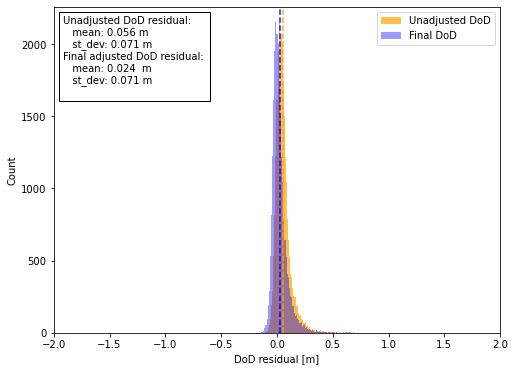

In [80]:
#Evaluate using stable_evaluation polygons
#Clip

#Convert DoD to point shapefile, then clip with stable evaluation polygons and rename field to 'dodresid'

#convert to points scratchfile
print('Coverting DoD to points ...')
arcpy.RasterToPoint_conversion(str(finaldod), r"memory\tempRasPt", "VALUE");
# arcpy.RasterToPoint_conversion(str(finaldod), r"D:\temp\arcpyscratch\tempRasPt.shp", "VALUE");

#subdivide polygon?
print('Subdividing polygons ...')
arcpy.SubdividePolygon_management(
    str(instableevalpoly_shp), str(outsubdividedpoly_shp), "EQUAL_AREAS","", target_subpoly_area, "", "", 
    "STACKED_BLOCKS");

#clip scratchfile
print('Clipping points to stable areas ...')
# arcpy.Clip_analysis(r"memory\tempRasPt", str(outsubdividedpoly_shp), str(outstableevalpt_shp), "");
arcpy.Clip_analysis(r"memory\tempRasPt", str(outsubdividedpoly_shp), r"memory\tempRasPtClip", "");

#extract unadjdod
print('Extracting unadjusted DoD values ...')
ExtractValuesToPoints(r"memory\tempRasPtClip", str(unadjdod), str(outstableevalpt_shp),"NONE","VALUE_ONLY");

#Calc stats and rename field
print('Renaming field in point shapefile ...')
ingdf = gpd.read_file(outstableevalpt_shp)
ingdf.rename(columns={'grid_code': 'dodresid'}, inplace=True)
ingdf.rename(columns={'RASTERVALU': 'unadjdod'}, inplace=True)

#spatial join tp get subpoly id on pts
print('Joining sub-polygon id to stable evalpoints ...')
subpolygdf = gpd.read_file(outsubdividedpoly_shp)
subpolygdf['subpolyid'] = subpolygdf.index
outgdf = gpd.sjoin(ingdf, subpolygdf, how="left", op='intersects')
outgdf.drop(columns=['index_right'], inplace=True)
# outgdf.rename(columns = {'id_left': 'id', 'type_left': 'type'}, inplace=True)

#write shp
outgdf.to_file(outstableevalpt_shp)

#write out stats table
outgdf.groupby('subpolyid')['dodresid'].describe().to_csv(outsubpolycsvtable)
outgdf.groupby('id')['dodresid'].describe().to_csv(outwholepolycsvtable)

#make abs residual field
outgdf['absdodresid'] = abs(outgdf['dodresid'])
outgdf['absunadjdodresid'] = abs(outgdf['unadjdod'])

#make output stats df
finaldodstatsdf = pd.DataFrame(
    {
    'bulkpt_abs_mean_resid': [abs(outgdf['dodresid'].mean())],
    'bulkpt_mean_abs_resid': [outgdf['absdodresid'].mean()],
    'bulkpt_std_resid': [outgdf['dodresid'].std(ddof=0)],

    'wholepoly_abs_mean_resid': [abs(outgdf.groupby('id')['dodresid'].mean().mean())],
    'wholepoly_mean_abs_resid': [outgdf.groupby('id')['absdodresid'].mean().mean()],
    'wholepoly_mean_std': [outgdf.groupby('id')['dodresid'].std(ddof=0).mean()],

    'subpoly_abs_mean_resid': [abs(outgdf.groupby('subpolyid')['dodresid'].mean().mean())],
    'subpoly_mean_abs_resid': [outgdf.groupby('subpolyid')['absdodresid'].mean().mean()],
    'subpoly_mean_std': [outgdf.groupby('subpolyid')['dodresid'].std(ddof=0).mean()],
    }
    )
unadjdodstatsdf = pd.DataFrame(
    {
    'bulkpt_abs_mean_resid': [abs(outgdf['unadjdod'].mean())],
    'bulkpt_mean_abs_resid': [outgdf['absunadjdodresid'].mean()],
    'bulkpt_std_resid': [outgdf['unadjdod'].std(ddof=0)],

    'wholepoly_abs_mean_resid': [abs(outgdf.groupby('id')['unadjdod'].mean().mean())],
    'wholepoly_mean_abs_resid': [outgdf.groupby('id')['absunadjdodresid'].mean().mean()],
    'wholepoly_mean_std': [outgdf.groupby('id')['unadjdod'].std(ddof=0).mean()],

    'subpoly_abs_mean_resid': [abs(outgdf.groupby('subpolyid')['unadjdod'].mean().mean())],
    'subpoly_mean_abs_resid': [outgdf.groupby('subpolyid')['absunadjdodresid'].mean().mean()],
    'subpoly_mean_std': [outgdf.groupby('subpolyid')['unadjdod'].std(ddof=0).mean()],
    }
    )
statsdf = pd.concat([finaldodstatsdf, unadjdodstatsdf],ignore_index=True)
statsdf.to_csv(outstatscsv, index=False)


#plot figure
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

sns.distplot( outgdf["unadjdod"] , color="orange", label="Unadjusted DoD", bins=100, kde=False, hist_kws={'alpha':0.7})
ax.axvline(outgdf["unadjdod"].mean(),color="orange", linestyle='--', alpha=0.9)
sns.distplot( outgdf["dodresid"] , color="blue", label="Final DoD", bins=100, kde=False)
ax.axvline(outgdf["dodresid"].mean(),color="blue", linestyle='--', alpha=0.9)
plt.legend()
plt.xlabel("DoD residual [m]");
plt.ylabel("Count");

stat_str = (f'Unadjusted DoD residual: \n'+
            f'   mean: {round(outgdf["unadjdod"].mean(),3)} m \n'
            f'   st_dev: {round(outgdf["unadjdod"].std(ddof=0),3)} m \n'
            f'Final adjusted DoD residual: \n'
            f'   mean: {round(outgdf["dodresid"].mean(),3)}  m\n'
            f'   st_dev: {round(outgdf["dodresid"].std(ddof=0),3)} m \n');

anchored_text = AnchoredText(stat_str, loc=2)
ax.add_artist(anchored_text)
ax.axvline
plt.xlim(-2, 2)

plt.savefig(outfig)


# --------------------------------------------------------------------------
#### Deprecated cells below


#### No longer used, but kept in case
# --------------------------------------------------------------------------

### Evaluate Residual Error by splitting subdivided polygons into test/train subsets.
- Withhold 40% of polygons for test set
- Use remaining 60% of polygons to generate trend surface
- Evaluate residual using withheld subpolygons
- Iterate 100 times, then generate stats

In [ ]:
target_subpoly_area = 60 

outunadjdod = Path(outdod_unadj_dir,dodnamestem + '_' + aoi + r'_unadj.tif')

outpointswithsubpolyid_str =  str(Path(outdod_pt_dir, outunadjdod.stem + r'_stable_pts' + str(target_subpoly_area) + r'm_subpolyid.shp'))

outstablepolysubdivided_str = str(Path(str(stablepolyshp.with_suffix('')) + '_' + str(target_subpoly_area) + 'm.shp'))

In [ ]:
#Evaluate Residual Error by splitting subdivided polygons into test/train subsets.
#Create new trend surface with train subset, evaluate residual offset with test subset
#group evaluations by both "subpoly" and "whole poly", and write output to csv

#order of polynomial for trend surface
PolynomialOrder = SelectedPolynomialOrderSurface

#Iterate and do test/train splits to evaluate by subpolygon
print(datetime.now().strftime("%Y/%d/%m %H:%M:%S"))    
#number of iterations (~2-3 minutes each?)
# num_loops = 100
num_loops = 50


#inputs
pointswithsubpolyid = outpointswithsubpolyid_str #from cell above
stablepolysubdivided = outstablepolysubdivided_str #from cell above

#load points with subpoly id into gdf to be filtered
ptwithpolygdf = gpd.read_file(pointswithsubpolyid)

#trend surface details
zField = "dod_unadj"
cellSize = 0.25
regressionType = "LINEAR"

#result df
resultsdf_subpoly = pd.DataFrame(columns = ['bulk_pt_mean','bulk_pt_std','all_poly_mean','all_poly_std',
                                            'paved_poly_mean','paved_poly_std','unpaved_poly_mean','unpaved_poly_std'])
resultsdf_poly = pd.DataFrame(columns = ['bulk_pt_mean','bulk_pt_std','all_poly_mean','all_poly_std',
                                         'paved_poly_mean','paved_poly_std','unpaved_poly_mean','unpaved_poly_std'])
#percent of poly to use for train 
trainfrac = 0.6

for i in range(num_loops):
    #clean up scratch dir first (leave results of final iteration in scratch to let user see them)
    for fn in [r"\temp_trainpoly.shp", r"\temp_valpoly.shp", r"\temp_trainpoint.shp", r"\temp_valpoint.shp", 
               r"\temp_valpoint_withdetrend.shp",r"\temp_trendraster.tif"]:
        arcpy.management.Delete(arcpy.env.workspace + fn)
    print(f'Beginning iteration {i} ...')
    #subset poly to test/train
    arcpy.ga.SubsetFeatures(stablepolysubdivided, 
                            arcpy.env.workspace + r"\temp_trainpoly.shp", 
                            arcpy.env.workspace + r"\temp_valpoly.shp", 60, "PERCENTAGE_OF_INPUT")
    #load each to get poly id
    trainpolygdf = gpd.read_file(arcpy.env.workspace + r"\temp_trainpoly.shp")
    valpolygdf = gpd.read_file(arcpy.env.workspace + r"\temp_valpoly.shp")
    
    #use subpolyid to select train/val points
    trainptgdf = ptwithpolygdf[ptwithpolygdf['subpolyid'].isin(trainpolygdf['subpolyid'].tolist())]
    valptgdf = ptwithpolygdf[ptwithpolygdf['subpolyid'].isin(valpolygdf['subpolyid'].tolist())]
    
    #write to temp
    trainptgdf.to_file(arcpy.env.workspace + r"\temp_trainpoint.shp")
    valptgdf.to_file(arcpy.env.workspace + r"\temp_valpoint.shp")
    
    #create trend surface
    # Execute Trend
    print('Creating trend surface...')
    outTrend = Trend(arcpy.env.workspace + r"\temp_trainpoint.shp", zField, cellSize, 
                     PolynomialOrder, regressionType)
    outTrend.save(arcpy.env.workspace + r"\temp_trendraster.tif")
    del outTrend
    
    #Sample raster on validate points
    print('Sampling trend surface...')
    ExtractValuesToPoints(arcpy.env.workspace + r"\temp_valpoint.shp", 
                          arcpy.env.workspace + r"\temp_trendraster.tif", 
                          arcpy.env.workspace + r"\temp_valpoint_withdetrend.shp",
                          "NONE", "VALUE_ONLY")
    
    #read into gdf to eval
    print('Evaluating trend surface...')
    evalgdf = gpd.read_file(arcpy.env.workspace + r"\temp_valpoint_withdetrend.shp")
    #apply to DoD value (dod_unadj - trendRasterValue)
    evalgdf['resid'] = evalgdf['dod_unadj'] - evalgdf['RASTERVALU']
    
    #gather residuals grouped by subpolygons
    data_subpoly = {'bulk_pt_mean': [evalgdf['resid'].mean()],
            'bulk_pt_std': [evalgdf['resid'].std()],
            'all_poly_mean': [evalgdf.groupby('subpolyid')['resid'].mean().mean()],
            'all_poly_std': [evalgdf.groupby('subpolyid')['resid'].mean().std()],
            'paved_poly_mean': [evalgdf[evalgdf['type'] == 'paved'].groupby('subpolyid')['resid'].mean().mean()],
            'paved_poly_std': [evalgdf[evalgdf['type'] == 'paved'].groupby('subpolyid')['resid'].mean().std()],
            'unpaved_poly_mean': [evalgdf[evalgdf['type'] == 'unpaved'].groupby('subpolyid')['resid'].mean().mean()],
            'unpaved_poly_std': [evalgdf[evalgdf['type'] == 'unpaved'].groupby('subpolyid')['resid'].mean().std()]
           }
    resultsdf_subpoly = resultsdf_subpoly.append(pd.DataFrame(data_subpoly, 
                                              columns = ['bulk_pt_mean','bulk_pt_std','all_poly_mean','all_poly_std',
                                                         'paved_poly_mean','paved_poly_std','unpaved_poly_mean','unpaved_poly_std']), 
                                 ignore_index=True)
    
    #gather residuals grouped by entire polygons
    data_poly = {'bulk_pt_mean': [evalgdf['resid'].mean()],
            'bulk_pt_std': [evalgdf['resid'].std()],
            'all_poly_mean': [evalgdf.groupby('id')['resid'].mean().mean()],
            'all_poly_std': [evalgdf.groupby('id')['resid'].mean().std()],
            'paved_poly_mean': [evalgdf[evalgdf['type'] == 'paved'].groupby('id')['resid'].mean().mean()],
            'paved_poly_std': [evalgdf[evalgdf['type'] == 'paved'].groupby('id')['resid'].mean().std()],
            'unpaved_poly_mean': [evalgdf[evalgdf['type'] == 'unpaved'].groupby('id')['resid'].mean().mean()],
            'unpaved_poly_std': [evalgdf[evalgdf['type'] == 'unpaved'].groupby('id')['resid'].mean().std()]
           }
    resultsdf_poly = resultsdf_poly.append(pd.DataFrame(data_poly, 
                                              columns = ['bulk_pt_mean','bulk_pt_std','all_poly_mean','all_poly_std',
                                                         'paved_poly_mean','paved_poly_std','unpaved_poly_mean','unpaved_poly_std']), 
                                 ignore_index=True)
    
    
    print(datetime.now().strftime("%Y/%d/%m %H:%M:%S"))   
        
    #write intermediate output, overwrite to save progress
    resultsdf_subpoly.to_csv(Path(outtrendraster_dir, detrendnamestem + r'_order_' + str(PolynomialOrder) + 
                                  r'_adjustment_eval_by_' + str(target_subpoly_area) + r'm_polygon.csv'))
    resultsdf_subpoly.describe([.025, .25, .5, .75, .975]).to_csv(Path(outtrendraster_dir, detrendnamestem + r'_order_' + str(PolynomialOrder) + 
                                     r'_adjustment_eval_by_' + str(target_subpoly_area) + r'm_polygon_summary_stats.csv'))
    
    resultsdf_poly.to_csv(Path(outtrendraster_dir, detrendnamestem + r'_order_' + str(PolynomialOrder) + r'_adjustment_eval_by_whole_polygon.csv'))
    resultsdf_poly.describe([.025, .25, .5, .75, .975]).to_csv(Path(outtrendraster_dir, detrendnamestem + r'_order_' + str(PolynomialOrder) + 
                                     r'_adjustment_eval_by_whole_polygon_summary_stats.csv'))

